In [33]:
import torch

from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchvision.transforms as T

from forward_forward_pytorch.model import LinearFF, FFMLP
from forward_forward_pytorch.predict import add_label_to_x, predict_linear, predict_mlp

import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [5]:
device = torch.device("cuda")

In [6]:
transforms = T.Compose([
    T.ToTensor(),
    T.Normalize((0.1307,), (0.3081,)),
    T.Lambda(lambda x: torch.flatten(x))
])

In [7]:
mnist_train = MNIST("./data", train=True, download=True, transform=transforms)
mnist_test  = MNIST("./data", train=False, download=True, transform=transforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [12]:
train_loader = DataLoader(
    mnist_train,
    batch_size=2048,
    pin_memory=True,
    shuffle=True
)

In [13]:
test_loader = DataLoader(
    mnist_test,
    batch_size=1,
    pin_memory=True,
    shuffle=True
)

In [14]:
x, y = next(iter(train_loader))
x_pos, y_pos = add_label_to_x(x, y)

In [15]:
x_pos[0, :10]

tensor([-0.0000, -0.0000, -0.0000, 2.8215, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000,
        -0.0000])

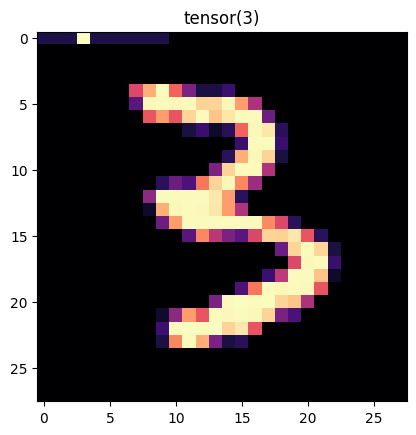

In [21]:
plt.imshow(x_pos[0].reshape(28, 28), cmap="magma")
plt.title(y_pos[0])
plt.show()

## Linear Forward Forward

In [9]:
ff_layer = LinearFF(784, 500)
ff_layer = ff_layer.to(device)

Train the Network

In [23]:
for x, y in tqdm(train_loader):
    x, y = x.to(device), y.to(device)
    B, WH = x.shape
    pos_x, pos_y = add_label_to_x(x, y)
    neg_labels = torch.randint(low=0, high=10, size=(B,))
    neg_x, neg_y = add_label_to_x(x, neg_labels)

    ff_layer.train(pos_x, neg_x, num_epochs=1000)

  0%|          | 0/30 [00:00<?, ?it/s]

In [24]:
x, y = next(iter(test_loader))
test_input = x[0][None, ...]
test_input = test_input.to(device)

In [28]:
predict_linear(ff_layer, test_input, device=device, debug=True)

test for 0, goodness = tensor([0.2051], device='cuda:0')
test for 1, goodness = tensor([10.4332], device='cuda:0')
test for 2, goodness = tensor([0.], device='cuda:0')
test for 3, goodness = tensor([0.1799], device='cuda:0')
test for 4, goodness = tensor([0.2003], device='cuda:0')
test for 5, goodness = tensor([0.0658], device='cuda:0')
test for 6, goodness = tensor([0.1275], device='cuda:0')
test for 7, goodness = tensor([0.0964], device='cuda:0')
test for 8, goodness = tensor([0.1372], device='cuda:0')
test for 9, goodness = tensor([0.0272], device='cuda:0')


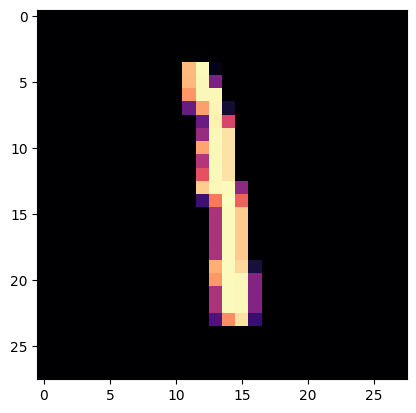

In [29]:
plt.imshow(test_input[0].reshape(28, 28).cpu(), cmap="magma")
plt.show()

# MLP Forward Forward

In [30]:
ffmlp = FFMLP(device)

Train MLP

In [31]:
for x, y in tqdm(train_loader):
    x, y = x.to(device), y.to(device)
    B, WH = x.shape
    pos_x, pos_y = add_label_to_x(x, y)
    neg_labels = torch.randint(low=0, high=10, size=(B,))
    neg_x, neg_y = add_label_to_x(x, neg_labels)

    ffmlp.train(pos_x, neg_x, num_epochs=1000)

  0%|          | 0/30 [00:00<?, ?it/s]

In [34]:
predict_mlp(ffmlp, test_input, debug=True)

test for 0, goodness=tensor([0.], device='cuda:0')
test for 1, goodness=tensor([43.6622], device='cuda:0')
test for 2, goodness=tensor([0.], device='cuda:0')
test for 3, goodness=tensor([34.9753], device='cuda:0')
test for 4, goodness=tensor([4.4248], device='cuda:0')
test for 5, goodness=tensor([4.8709], device='cuda:0')
test for 6, goodness=tensor([3.4832], device='cuda:0')
test for 7, goodness=tensor([34.9332], device='cuda:0')
test for 8, goodness=tensor([3.3230], device='cuda:0')
test for 9, goodness=tensor([0.], device='cuda:0')


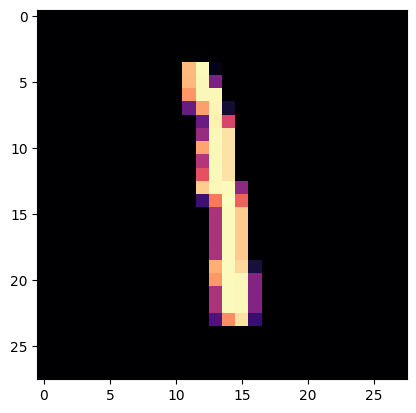

In [35]:
plt.imshow(test_input[0].reshape(28, 28).cpu(), cmap="magma")
plt.show()